## Loading of Stringer spontaneous data

includes some visualizations

In [2]:
#@title Data retrieval - spontaneous
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [3]:
#@title Data retrieval - evoked
import os, requests

fname = "stringer_orientations.npy"
url = "https://osf.io/ny4ut/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [ ]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [4]:
#@title Data loading
import numpy as np
spont_dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(spont_dat.keys())

#@title Data loading
evoked_dat = np.load('stringer_orientations.npy', allow_pickle=True).item()
print(evoked_dat.keys())


dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])
dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])



dat has fields:
* `dat['sresp']`: neurons by timebins, a.k.a. the neural response data (14752 by 8118). Timebin = 1.2 sec.
* `dat['run']`: timebins by 1, a.k.a. the running speed of the animal in a.u.
* `dat['xyz']`: three-dimensional position of each neuron in the brain. 
* `dat['pupilArea']`: timebins by 1, see FaceMap for details on the pupil tracker
* `dat['pupilCOM']`: timebins by 2, correspond to X and Y position. See FaceMap for details on the pupil tracker.
* `dat['beh_svd_time']`: timebins by 1,000. Timecourses of behavioral SVDs extracted from face movies. See FaceMap for details. 
* `dat['beh_svd_mask']`: 240 by 320 by 1,000. Spatial masks of behavioral SVDs. Roughly normalized to each other. 
* `dat['beh_svd_mask'] @ dat['beh_svd_time'][T, :]`:  reconstruction of the face movie (its motion energy) for frame T
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.

In [5]:
print(spont_dat['sresp'].shape)
print(len(spont_dat['stat']))

(11983, 7018)
11983


In [ ]:
print(evoked_dat['sresp'].shape)
print(len(evoked_dat['stat']))

(23589, 4598)
23589


In [ ]:
min(spont_dat['xyz'][2])

-390.0

# **Process spontaneous data**

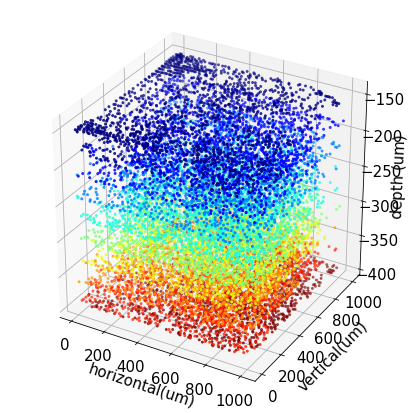

In [ ]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = spont_dat['xyz']

zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 4, c = cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

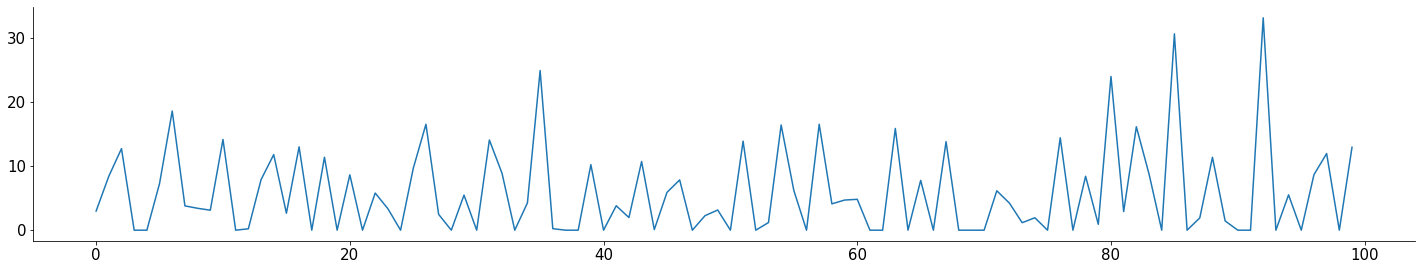

In [ ]:
plt.plot(spont_dat['sresp'][0,0:100])

In [ ]:
# ASSIGN LAYER LABELS TO EACH CELL
#L2/3 = 150 - 300
# L4 = 300 - 400
# L5 = 400 - 
abs_z = abs(z)
l2_spont = np.where(abs_z < 300)[0]
l4_spont = np.where(np.logical_and(abs_z >= 300, abs_z < 400))[0]

spont_labels = np.zeros(z.shape[0])
spont_labels[l2_spont] = 2
spont_labels[l4_spont] = 4

-150.0
-150.0


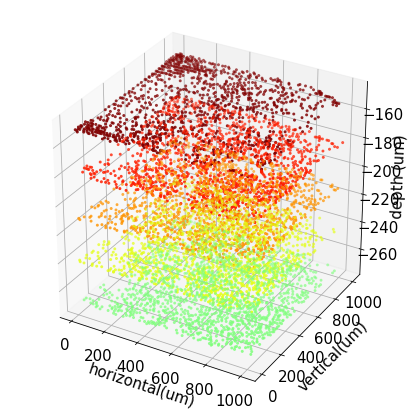

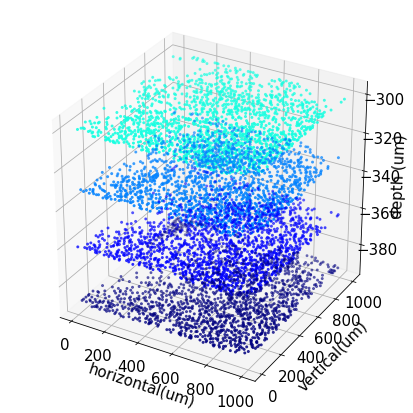

In [ ]:
# @title plot the 3D positions of all neurons
label_vec = [2,4]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
for i in label_vec:
  x, y, z = spont_dat['xyz']
  print(np.max(z))
  zunq, iunq = np.unique(z, return_inverse=True)
  xc = np.linspace(0.0, 1.0, len(zunq))
  cmap = cm.get_cmap('jet')(xc)

  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111, projection='3d')
  current_layer = np.where(spont_labels == i)[0]
  ax.scatter(x[current_layer],y[current_layer],z[current_layer], 'o', s = 4, c = cmap[iunq][current_layer])
  ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

In [ ]:
l2_spont_sample = np.random.choice(l2_spont, len(l5_evoked))
l4_spont_sample = np.random.choice(l4_spont, len(l5_evoked))

spont_labels_sample = np.zeros(z.shape[0])
spont_labels_sample[l2_spont_sample] = 2
spont_labels_sample[l4_spont_sample] = 4

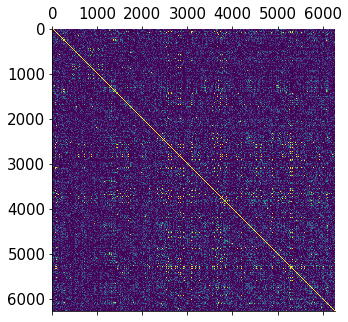

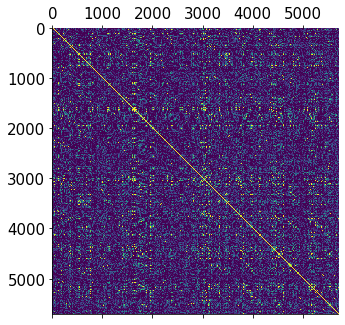

In [ ]:
# CALCULATE CORRELATION FOR EACH LAYER
label_vec = [2,4]
for i in label_vec:
  f, ax = plt.subplots(figsize = (5,5))
  current_layer = np.where(spont_labels == i)[0]
  corr = np.corrcoef(spont_dat['sresp'][current_layer])
  ax.matshow(corr, vmin = 0, vmax = 0.1)
  #cax0 = divider.append_axes("right", size="5%", pad=0.05)
  #cbar0 = f.colorbar(plot1, cax=cax0, label = 'correlation')  
  plt.show()

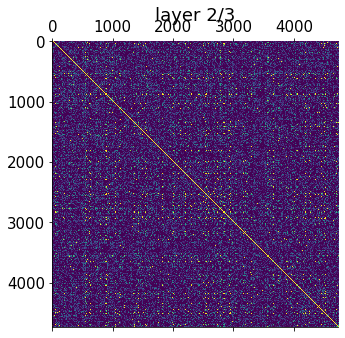

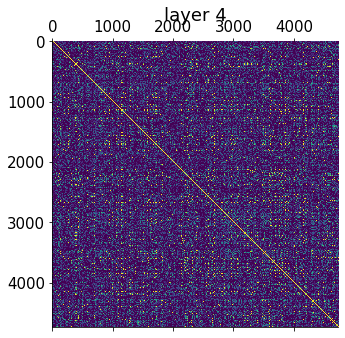

In [ ]:
# CALCULATE CORRELATION FOR EACH LAYER (SAME NUMBER OF CELLS)
label_vec = [l2_spont_sample,l4_spont_sample]
layer_names = ['layer 2/3', 'layer 4']

for j,i in enumerate (label_vec):
  f, ax = plt.subplots(figsize = (5,5))
  corr = np.corrcoef(spont_dat['sresp'][i])
  ax.matshow(corr, vmin = 0, vmax = 0.1)
  plt.title(layer_names[j])

  plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


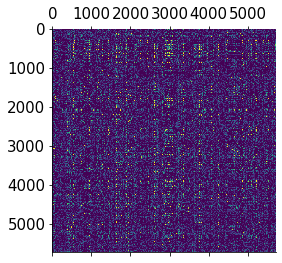

In [ ]:
corr = np.corrcoef(spont_dat['sresp'][l2_spont_sample], spont_dat['sresp'][l4_spont])
plt.matshow(corr[-len(l2_spont_sample):,:len(l2_spont_sample)], vmin = 0, vmax = 0.1)
plt.show()

# **Process evoked data**

In [6]:

#@title import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

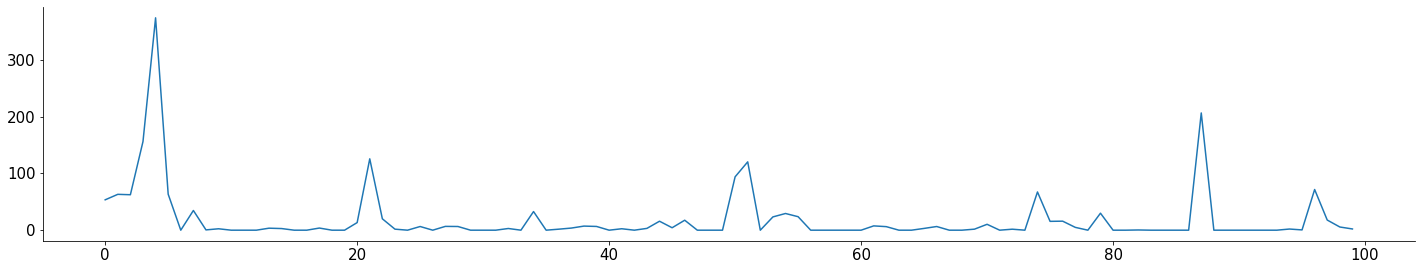

In [6]:
plt.plot(evoked_dat['sresp'][0,0:100])

-150.0


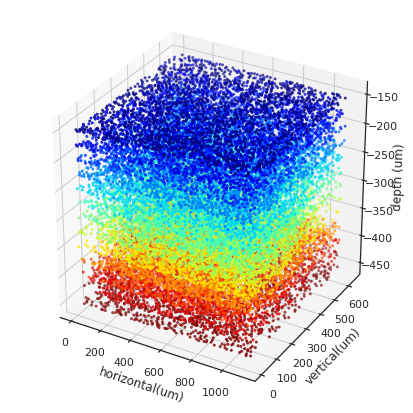

In [7]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = evoked_dat['xyz']
print(np.max(z))
zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1],z[::-1], 'o', s = 4, c = cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

**Build minidomains**

-150.0


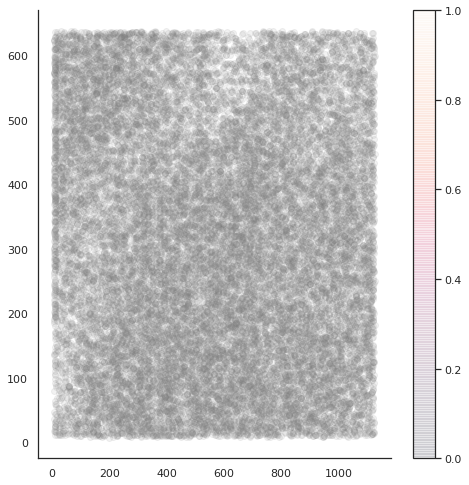

In [8]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = evoked_dat['xyz']
print(np.max(z))
zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

traces = evoked_dat['sresp']
stim = evoked_dat['istim']
coords = np.vstack((evoked_dat['xyz']))

plt.figure(figsize=(7,7))
plt.scatter(coords[0],coords[1],c = 'grey', alpha = 0.1)
plt.colorbar()



In [14]:
def tile_cells(x_coords, y_coords, size, xmax, ymax):
  count = 0
  current_x = 0
  borders = np.zeros((xmax//size * ymax//size,2))
  cell_labels = list(range(xmax//size * ymax//size))
  #Loop through x
  for x in range(xmax//size):
    current_x += size
    current_y = 0
    #Loop through y
    for y in range(ymax//size):
      current_y += size 
      borders[count] = current_x,current_y

      #Define cell labels
      x_bound = np.where((x_coords > current_x - size) & (x_coords <current_x))[0]
      y_bound = np.where((y_coords > current_y - size) & (y_coords <current_y))[0]
      cell_labels[count] = np.intersect1d(x_bound, y_bound)
      count+=1

  return(cell_labels)

x_coords = coords[0]
y_coords = coords[1]
xmax = 1000
ymax = 600
size = 50
labels = tile_cells(x_coords, y_coords, size, xmax,ymax)



(0.0, 1000.0)

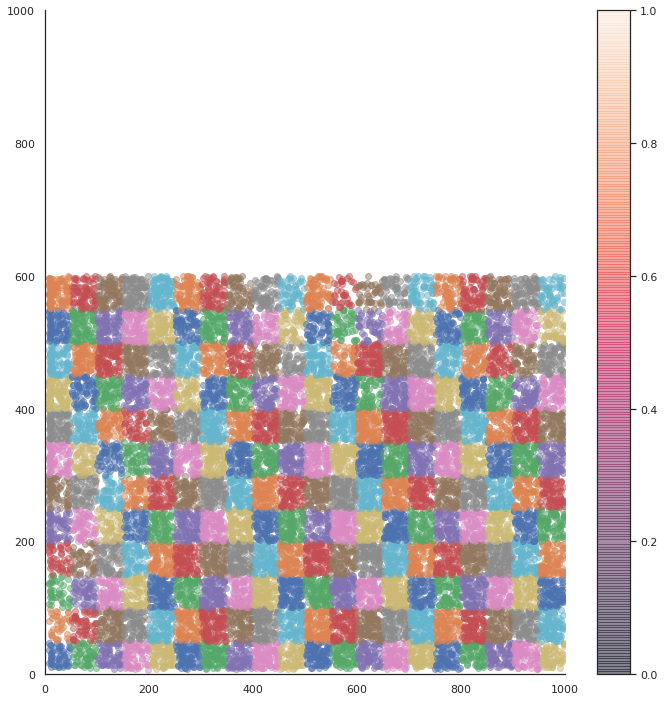

In [15]:
plt.figure(figsize=(10,10))
for i in range(len(labels)):
  plt.scatter(x_coords[labels[i]],y_coords[labels[i]], alpha = 0.5)
plt.colorbar()
plt.ylim(0,1000)
plt.xlim(0,xmax)

In [16]:
# Find orientation tuning of each cell
def cell_tuning(data, cell_labels):
  var_vec = np.zeros(len(cell_labels))
  tuning_list = list(range(len(cell_labels)))
  for x in range(len(cell_labels)):
    current_traces = data[cell_labels[x]]
    tuning_vec = np.zeros(current_traces.shape[0])
    for i in range(current_traces.shape[0]):
      this_trace = current_traces[i]
      tuning_vec[i] = np.where(this_trace ==  np.max(this_trace))[0][0]
    var_vec[x] = np.var(tuning_vec)
    tuning_list[x] = tuning_vec
  return(var_vec, tuning_list)

data = evoked_dat['sresp']
variance, tunings = cell_tuning(data, labels)


In [20]:
# Generate nulls
i=0
n_nulls = 1000
current_stack = coords[:,labels[i]]
null_list = list(range(n_nulls))
for x in range(n_nulls):
  null_list[x] = np.random.choice(np.arange(0, coords.shape[1]), current_stack.shape[1])

data = evoked_dat['sresp']
null_variance, null_tunings = cell_tuning(data, null_list)

In [21]:
import pandas as pd
length = len(np.append(variance, null_variance))
names = list(range(length))
for i in range(length):
  if i < len(variance):
    names[i] = 'Empirical'
  else:
    names[i] = 'Nulls'
df = pd.DataFrame({"Orientation variance":np.append(variance, null_variance) ,"Labels": names})

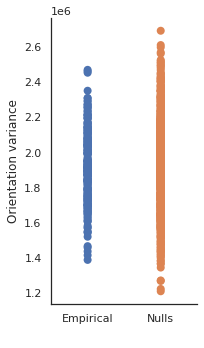

In [23]:
import seaborn as sns
sns.set(style="white")
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="Labels", y="Orientation variance", data=df, size = 8, jitter = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylabel('Loglikelihood ratio', size = '15')
#ax.set_xticklabels(['Size', 'Duration'], size = 13)
ax.set_xlabel(' ', size = '13')
#ax.legend_.remove()
plt.show()

In [211]:
variance.shape

(60,)

In [212]:
null_variance.shape

(1000,)

In [184]:
np.arange(0, coords.shape[1])

array([    0,     1,     2, ..., 23586, 23587, 23588])

In [157]:
coords[:,labels[i]].shape

(3, 209)

In [ ]:
# ASSIGN LAYER LABELS TO EACH CELL
#L2/3 = 150 - 300
# L4 = 300 - 400
# L5 = 400 - 
abs_z = abs(z)
l2_evoked = np.where(abs_z < 300)[0]
l4_evoked = np.where(np.logical_and(abs_z >= 300, abs_z < 400))[0]
l5_evoked = np.where(abs_z >= 400)[0]

evoked_labels = np.zeros(z.shape[0])
evoked_labels[l2_evoked] = 2
evoked_labels[l4_evoked] = 4
evoked_labels[l5_evoked] = 5

-150.0
-150.0
-150.0


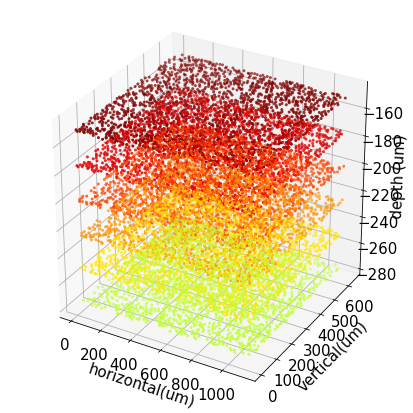

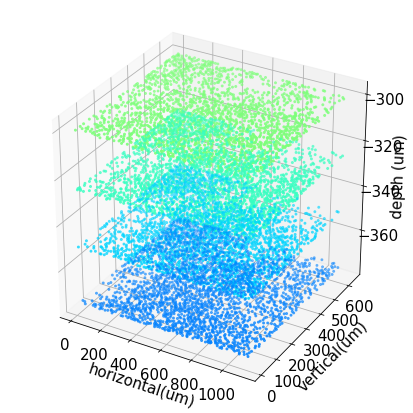

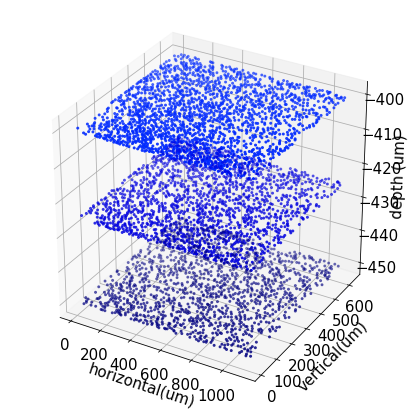

In [ ]:
# @title plot the 3D positions of all neurons
label_vec = [2,4,5]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
for i in label_vec:
  x, y, z = evoked_dat['xyz']
  print(np.max(z))
  zunq, iunq = np.unique(z, return_inverse=True)
  xc = np.linspace(0.0, 1.0, len(zunq))
  cmap = cm.get_cmap('jet')(xc)

  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(111, projection='3d')
  current_layer = np.where(evoked_labels == i)[0]
  ax.scatter(x[current_layer],y[current_layer],z[current_layer], 'o', s = 4, c = cmap[iunq][current_layer])
  ax.set(xlabel='horizontal(um)', ylabel = 'vertical(um)', zlabel='depth (um)');

In [ ]:
l2_evoked_sample = np.random.choice(l2_evoked, len(l5_evoked))
l4_evoked_sample = np.random.choice(l4_evoked, len(l5_evoked))

evoked_labels_sample = np.zeros(z.shape[0])
evoked_labels_sample[l2_evoked_sample] = 2
evoked_labels_sample[l4_evoked_sample] = 4
evoked_labels_sample[l5_evoked] = 5

In [ ]:
l4_evoked_sample.shape

(4739,)

# **Dimensionality of layers**

In [ ]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [ ]:
layer2_3_spont = spont_dat['sresp'][l2_spont_sample]
layer4_spont = spont_dat['sresp'][l4_spont_sample]

layer2_3_evoked = evoked_dat['sresp'][l2_evoked_sample]
layer4_evoked = evoked_dat['sresp'][l4_evoked_sample]
layer5_evoked = evoked_dat['sresp'][l5_evoked]

In [ ]:
layer2_3_spont_pca = PCA()
layer2_3_spont_pca.fit(layer2_3_spont.T)

layer4_spont_pca = PCA()
layer4_spont_pca.fit(layer4_spont.T)

layer2_3_evoked_pca = PCA()
layer2_3_evoked_pca.fit(layer2_3_evoked.T)

layer4_evoked_pca = PCA()
layer4_evoked_pca.fit(layer4_evoked.T)

layer5_evoked_pca = PCA()
layer5_evoked_pca.fit(layer5_evoked.T)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

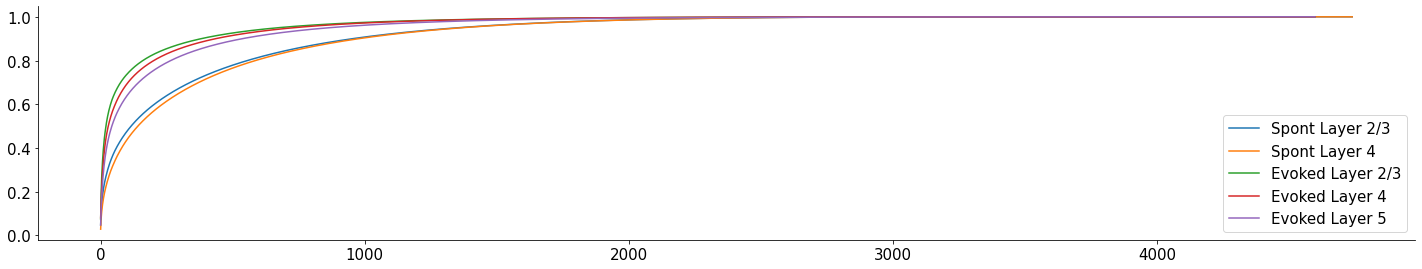

In [ ]:
layer_2_3_spont_explained_variance = np.cumsum(layer2_3_spont_pca.explained_variance_ratio_)
layer_4_spont_explained_variance = np.cumsum(layer4_spont_pca.explained_variance_ratio_)

layer_2_3_evoked_explained_variance = np.cumsum(layer2_3_evoked_pca.explained_variance_ratio_)
layer_4_evoked_explained_variance = np.cumsum(layer4_evoked_pca.explained_variance_ratio_)
layer_5_evoked_explained_variance = np.cumsum(layer5_evoked_pca.explained_variance_ratio_)

plt.plot(layer_2_3_spont_explained_variance, label='Spont Layer 2/3')
plt.plot(layer_4_spont_explained_variance, label='Spont Layer 4')
plt.plot(layer_2_3_evoked_explained_variance, label='Evoked Layer 2/3')
plt.plot(layer_4_evoked_explained_variance, label='Evoked Layer 4')
plt.plot(layer_5_evoked_explained_variance, label='Evoked Layer 5')
plt.legend()

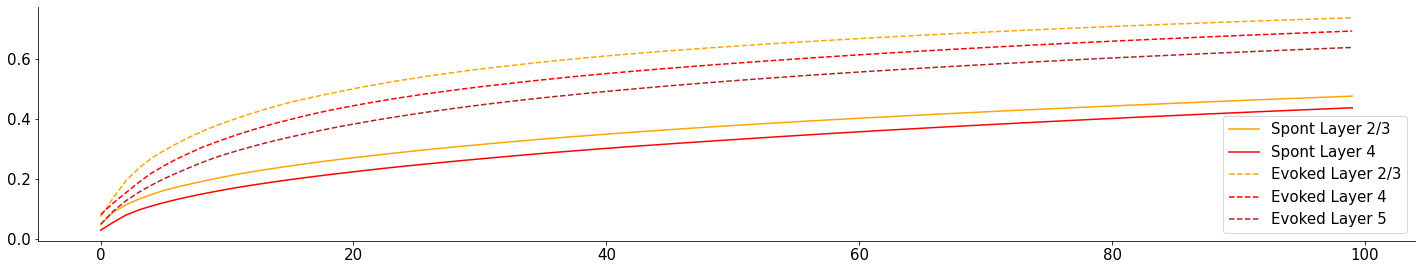

In [ ]:
plt.plot(layer_2_3_spont_explained_variance[:100], label='Spont Layer 2/3', c = 'orange')
plt.plot(layer_4_spont_explained_variance[:100], label='Spont Layer 4', c = 'red')
plt.plot(layer_2_3_evoked_explained_variance[:100], label='Evoked Layer 2/3', linestyle = '--', c = 'orange')
plt.plot(layer_4_evoked_explained_variance[:100], label='Evoked Layer 4',linestyle = '--', c = 'red')
plt.plot(layer_5_evoked_explained_variance[:100], label='Evoked Layer 5',linestyle = '--', c = 'firebrick')
plt.legend()

# **State space trajectory of each layer**

In [ ]:
#layer2_3_spont_pca = PCA()
#layer2_3_spont_pca.fit(layer2_3_spont.T)


n_components = 4

#NON-NEGATIVE MATRIX FACTORISATION
from sklearn import decomposition
pca = decomposition.PCA(n_components)
fit = pca.fit(layer2_3_spont)
    
    
    #Make matrix entirely positive



In [ ]:
np.min( spont_list[i] - np.min(spont_list[i]) )

0.0

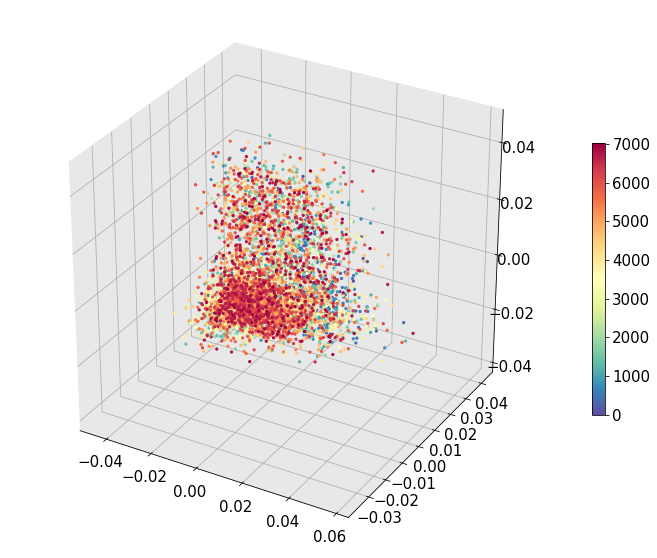

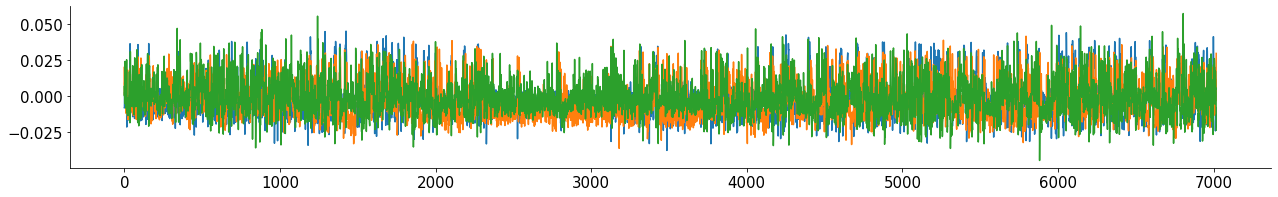

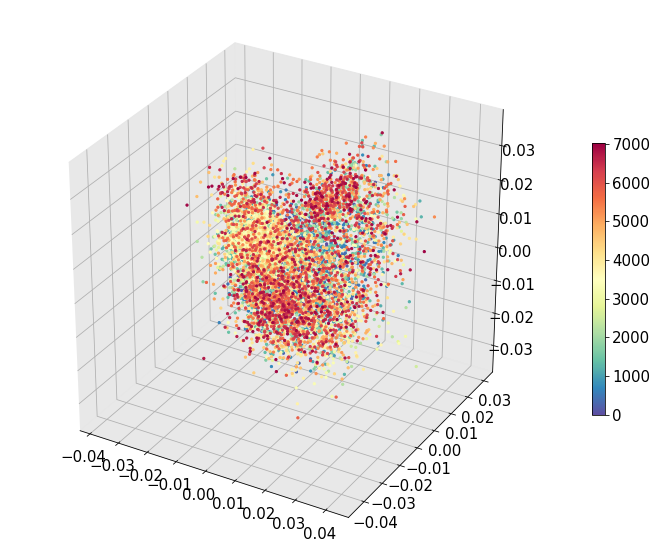

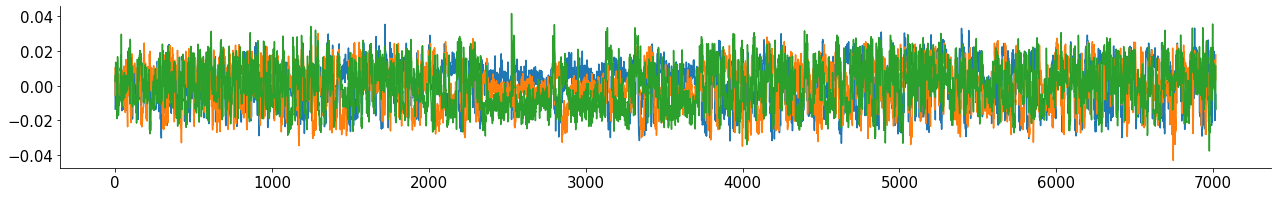

In [ ]:
from sklearn import decomposition
n_components = 4
#spontaneous
#---------------------------------
spont_list = [layer2_3_spont, layer4_spont]
for i in range(len(spont_list)):
  learn = decomposition.PCA(n_components)
  fit = learn.fit(spont_list[i])
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize= (10,8))
  ax = fig.add_subplot(projection='3d')
  dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
  ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  fig.colorbar(dotplot, shrink = 0.5)

  fig, ax = plt.subplots(figsize= (18,3))
  for i in range(3):
      plt.plot(fit.components_[i+1])
  plt.show()

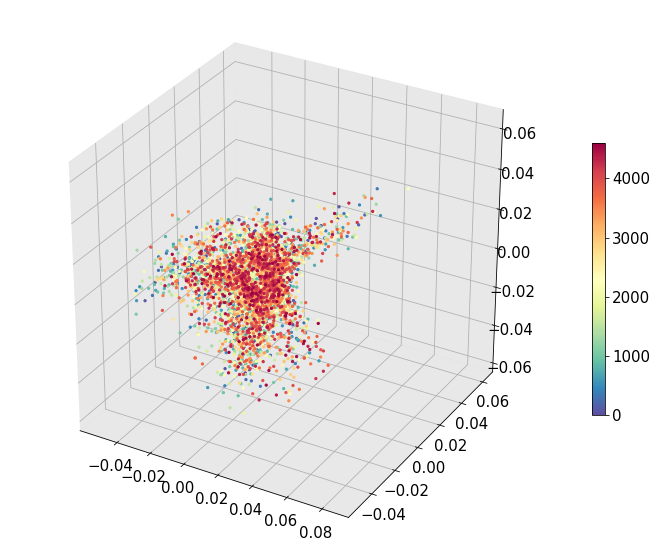

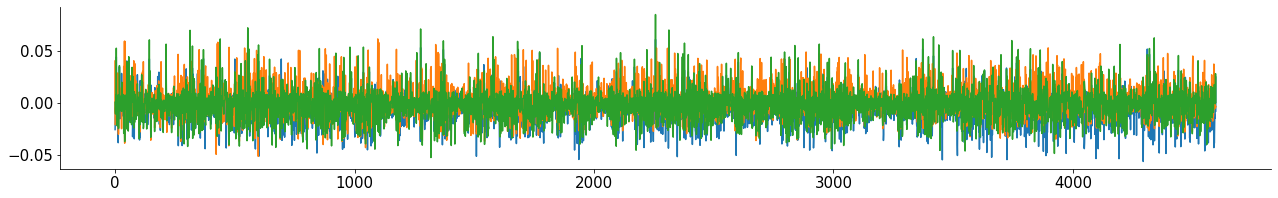

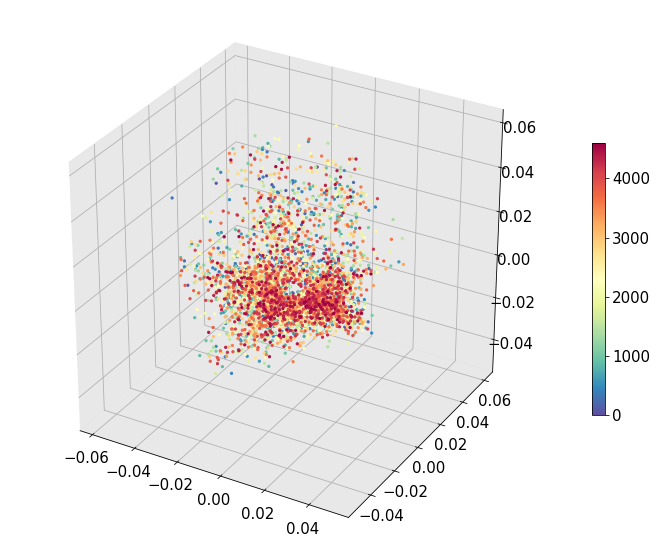

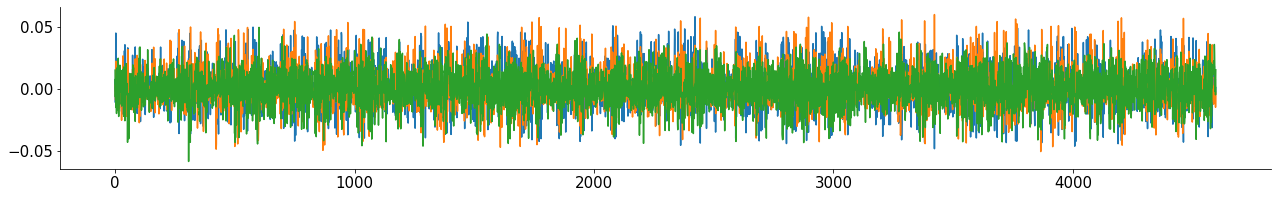

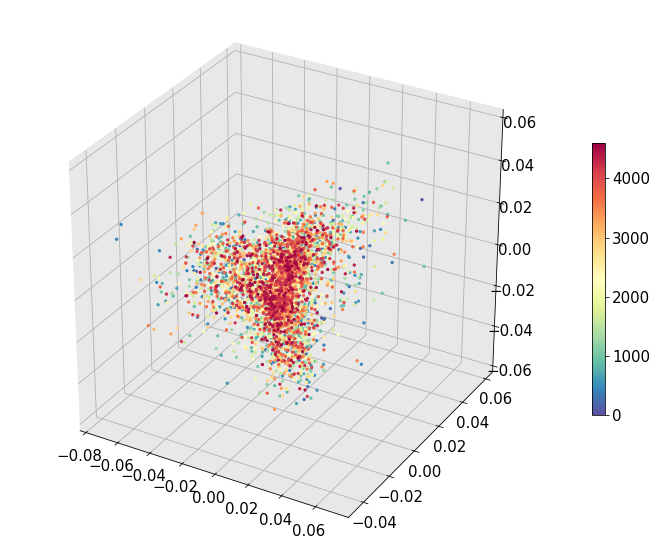

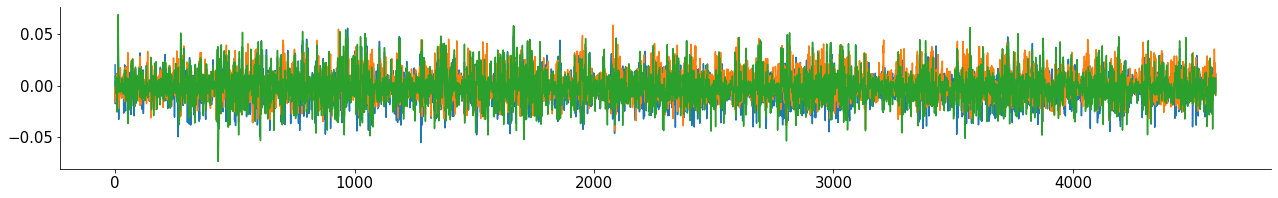

In [ ]:
from sklearn import decomposition
n_components = 4
#evoked
#---------------------------------
evoked_list = [layer2_3_evoked, layer4_evoked, layer5_evoked]
for i in range(len(evoked_list)):
  learn = decomposition.PCA(n_components)
  fit = pca.fit(evoked_list[i])
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize= (10,8))
  ax = fig.add_subplot(projection='3d')
  dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
  ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  fig.colorbar(dotplot, shrink = 0.5)

  fig, ax = plt.subplots(figsize= (18,3))
  for i in range(3):
      plt.plot(fit.components_[i+1])
  plt.show()

In [ ]:
>>> from sklearn.datasets import load_digits
>>> from sklearn.manifold import Isomap
>>> X, _ = load_digits(return_X_y=True)
>>> X.shape
(1797, 64)
>>> embedding = Isomap(n_components=2)
>>> X_transformed = embedding.fit_transform(X[:100])
>>> X_transformed.shape

(4739, 2)

AttributeError: ignored

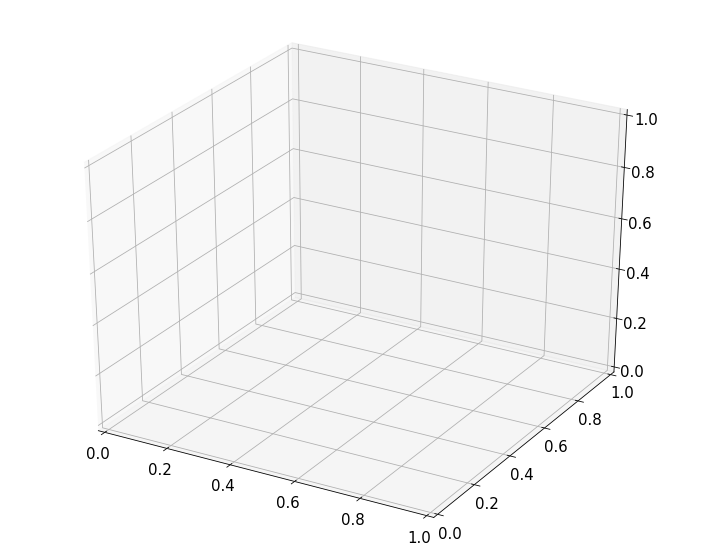

In [ ]:
from sklearn import decomposition
from sklearn.manifold import Isomap
n_components = 4
#evoked
#---------------------------------
evoked_list = [layer2_3_evoked, layer4_evoked, layer5_evoked]
for i in range(len(evoked_list)):
  learn = Isomap(n_components)
  fit = learn.fit_transform(evoked_list[i])
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize= (10,8))
  ax = fig.add_subplot(projection='3d')
  dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
  ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
  fig.colorbar(dotplot, shrink = 0.5)

  fig, ax = plt.subplots(figsize= (18,3))
  for i in range(3):
      plt.plot(fit.components_[i+1])
  plt.show()

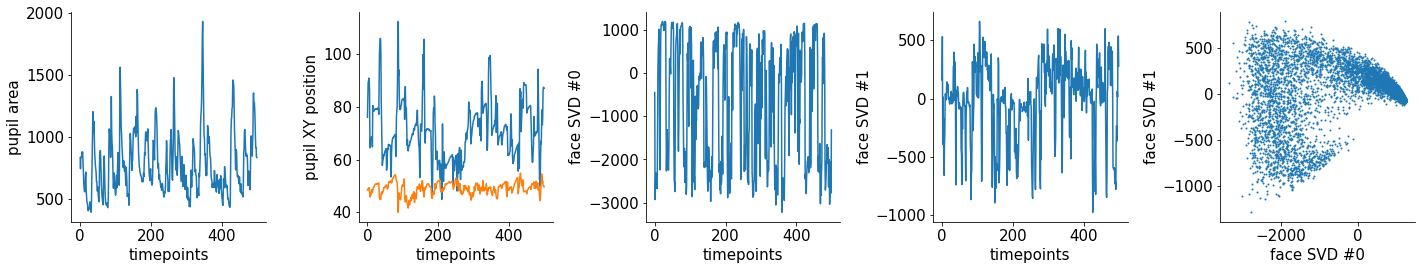

In [ ]:
#@title Basic properties of behavioral data using plot and scatter
ax = plt.subplot(1,5,1)
plt.plot(dat['pupilArea'][:500,0])
ax.set(xlabel='timepoints', ylabel = 'pupil area')

ax = plt.subplot(1,5,2)
plt.plot(dat['pupilCOM'][:500,:])
ax.set(xlabel='timepoints', ylabel = 'pupil XY position')

ax = plt.subplot(1,5,3)
plt.plot(dat['beh_svd_time'][:500,0])
ax.set(xlabel='timepoints', ylabel = 'face SVD #0')

ax = plt.subplot(1,5,4)
plt.plot(dat['beh_svd_time'][:500,1])
ax.set(xlabel='timepoints', ylabel = 'face SVD #1')

ax = plt.subplot(1,5,5)
plt.scatter(dat['beh_svd_time'][:,0], dat['beh_svd_time'][:,1], s = 1)
ax.set(xlabel='face SVD #0', ylabel = 'face SVD #1')

plt.show()

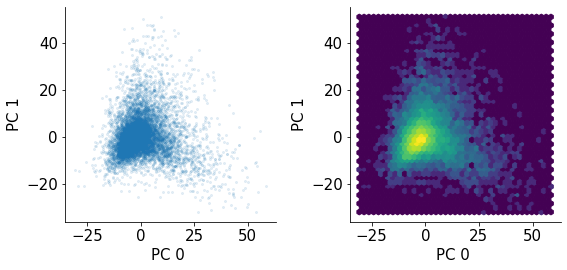

In [ ]:
#@title Plot PCs. Too many points, switch to logarithmic hexbin! 
ax = plt.subplot(1,5,1)
plt.scatter(X[:,0], X[:,1], s = 4, alpha = .1)
ax.set(xlabel = 'PC 0 ', ylabel = 'PC 1');

ax = plt.subplot(1,5,2)
plt.hexbin(X[:,0], X[:,1], gridsize = 40, bins = 'log')
ax.set(xlabel = 'PC 0 ', ylabel = 'PC 1', alpha = .1);

In [ ]:
#@title run a manifold embedding algorithm (UMAP) in two or three dimensions. 
!pip install umap-learn
from umap import UMAP
ncomp = 1 # try 2, then try 3
xinit = 1 * zscore(X[:,:ncomp], axis=0)
embed = UMAP(n_components=ncomp, init =  xinit, n_neighbors = 20, 
             metric = 'correlation', transform_seed = 42).fit_transform(X)
             

In [ ]:
from scipy.ndimage import uniform_filter1d
embed = embed.flatten()
isort = np.argsort(embed)
RasterMap = uniform_filter1d(Z[isort, :], size= 50, axis=0)
RasterMap = zscore(RasterMap[::10, :], axis = 1)

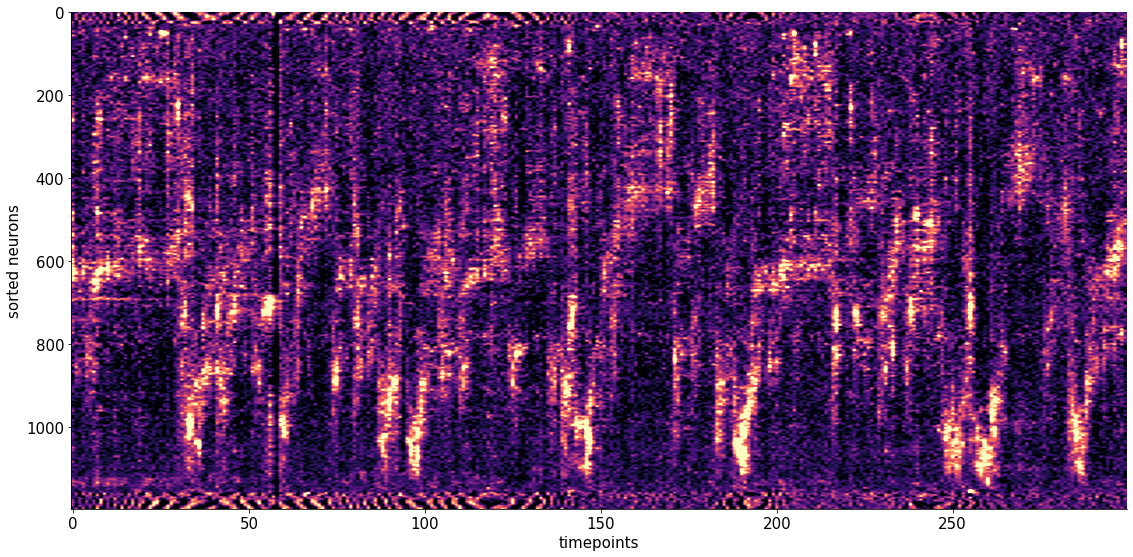

In [ ]:
plt.figure(figsize=(16,8))
ax = plt.subplot(111)
trange = np.arange(1100, 1400)
plt.imshow(RasterMap[:, trange], vmax= 3, vmin = -1, aspect = 'auto', cmap = 'magma')
ax.set(xlabel = 'timepoints', ylabel = 'sorted neurons');

In [ ]:
# now sort with UMAP both the neuron axis and the timepoints axis, bin the sorted matrix and make a sorted Rastermap picture 